# fMRI data analysis 


###<a href='#Introduction'>0. Packages Installation</a>###
###<a href='#fMRIdata'>1. fMRI raw data</a>###
###<a href='#Bloc'>2. Analysis of a bloc Paradigm</a>###

### 0.Packages Installation
In order for the code to run smoothly, we have to start with some installation. Please follow **very carefully** the steps described bellow

#### 0.1 terminal
launch a terminal using the **Menu des applications** on the top left of your screen, then **Émulateur de terminal**

#### 0.2 install the neuroimaging in python module (nipy)
In the terminal, type the following command
```bash
pip install --user nipy
```

#### 0.3 install the machine learning for neuroimaging module (nilearn)
In the terminal, type the following command
```bash
pip install --user nilearn
```

#### 0.4 install the Functional MRI Neuro-Imaging in Python module (nistats)
In the terminal, type the following command
```bash
pip install -U --user nistats
```

#### 0.5 create your nipy preferences folder
In the terminal, type the following command
```bash
mkdir -p ~/.nipy/nipy
```

#### 0.6 install the nipy templates
In the terminal, type the following command
```bash
cp -r ~/Desktop/BME_fMRI/templates ~/.nipy/nipy/
```

#### 0.7 check that all is well and nice
In the terminal, type the following command
```bash
python -c 'import nipy.utils; print(nipy.utils.templates)'
```

You should see an answer such as :  
`<nibabel.data.VersionedDatasource object at 0x7fdf75b269d0>`

## 1. fMRI raw data

###the analysis requires:
- the time series of BOLD signal
- the time series of what happened to the subject
- both to be synchronized!

See the organization of files at the [Brain Imaging Data Structure project](http://bids.neuroimaging.io/).

####1.1Decypher the description above in order to build a table of auditory stimulations and for each line, 2 columns, the first one being the time at which the stimulation begins, and the second one the duration of said stimulation.


session  condition  start  duration
   1     rest     0     42
   2   stimulation  42     42
   3     rest     84     42
   4   

In [3]:
from nistats.datasets import fetch_spm_auditory
import pandas as pd
subject_data = fetch_spm_auditory()
events = pd.read_table(subject_data['events'])
print(events)

    onset  duration trial_type
0     0.0      42.0       rest
1    42.0      42.0     active
2    84.0      42.0       rest
3   126.0      42.0     active
4   168.0      42.0       rest
5   210.0      42.0     active
6   252.0      42.0       rest
7   294.0      42.0     active
8   336.0      42.0       rest
9   378.0      42.0     active
10  420.0      42.0       rest
11  462.0      42.0     active
12  504.0      42.0       rest
13  546.0      42.0     active
14  588.0      42.0       rest
15  630.0      42.0     active


###1.2. Convolution with the Haemodynamic Response Function (HRF)
____
Since the BOLD signal is delayed relatively to the neural activity, the events stored in the paradigm descriptions are not accurately synchronous with the recorded signal. The the Haemodynamic Response Function is the transfer function that describe the recorded answer to a single event. Thus, through a convolution, you can predict the evolution of the BOLD signal from the time series of cerebral events you expect your paradigm to elicit.

In [17]:
# first, enable plotting within the notebook
%matplotlib inline

In [4]:
# we need the following modules
import numpy as np
import matplotlib.pyplot as plt
import nipy.modalities.fmri.hemodynamic_models as hm

Text(0.5, 0, 'time in s')

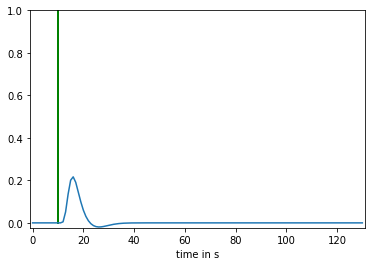

In [19]:
# then, let's plot this function as the output of a single phasic cerebral event
reg=np.zeros(100)
onset = 10
amplitude = 1
reg[onset] = amplitude
plt.plot((onset,onset),(0,amplitude), linewidth=2, color='g')

hrf = hm.spm_hrf(1.0, oversampling=1)
conv = np.convolve(reg, hrf);

plt.plot(conv)
plt.ylim(min(conv)*1.2, max([max(conv)*1.2, amplitude]))
plt.xlim(-1, len(conv))
plt.xlabel('time in s')

Text(0.5, 0, 'time in s')

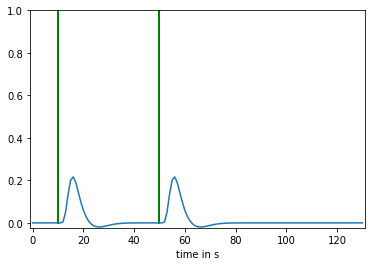

In [5]:
# now, let's add another single phasic cerebral activity
reg=np.zeros(100)
onset = 10
amplitude = 1
reg[onset] = amplitude
plt.plot((onset,onset),(0,amplitude), linewidth=2, color='g')

onset = 50
amplitude = 1
reg[onset] = amplitude
plt.plot((onset,onset),(0,amplitude), linewidth=2, color='g')

hrf = hm.spm_hrf(1.0, oversampling=1)
conv = np.convolve(reg, hrf);
plt.plot(conv)

plt.ylim(min(conv)*1.2, max([max(conv)*1.2, amplitude]))
plt.xlim(-1, len(conv))
plt.xlabel('time in s')

Text(0.5, 0, 'time in s')

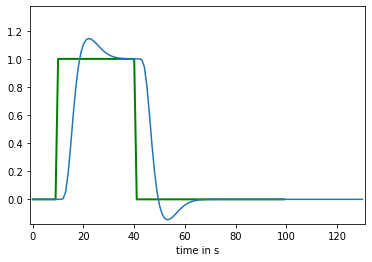

In [58]:
# now, let's see what happens to a sustained cerebral activity
reg=np.zeros(100)
onset = 10
amplitude = 1
duration = 30
reg[onset : onset + duration +1] = amplitude
plt.plot(reg, linewidth=2, color='g')

hrf = hm.spm_hrf(1.0, oversampling=1)
conv = np.convolve(reg, hrf);
plt.plot(conv)


plt.ylim(min(conv)*1.2, max([max(conv)*1.2, amplitude]))
plt.xlim(-1, len(conv))
plt.xlabel('time in s')

####1.3 use variations of the above code in order to explain why it would be impossible to discreminate close events

Text(0.5, 1.0, 'adjust scan repeat time')

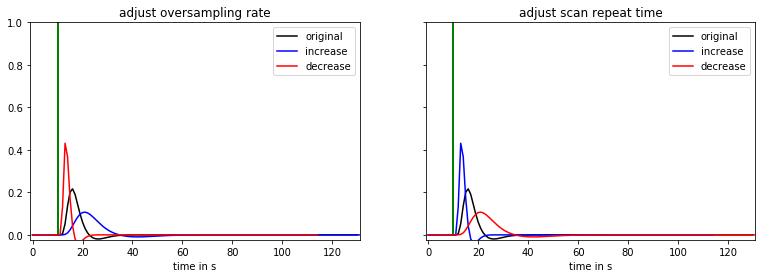

In [57]:
# use a code cell to show the code that would generate good explanatory graphs
reg=np.zeros(100)
onset = 10
amplitude = 1
reg[onset] = amplitude

hrf = hm.spm_hrf(1, oversampling=1)
#adjust oversampling parameter
hrf1 = hm.spm_hrf(1, oversampling=2)
hrf2 = hm.spm_hrf(1, oversampling=0.5)
#adjust tr parameter
hrf3 = hm.spm_hrf(2, oversampling=1)
hrf4 = hm.spm_hrf(0.5, oversampling=1)

conv = np.convolve(reg, hrf);
conv1 = np.convolve(reg, hrf1);
conv2 = np.convolve(reg, hrf2);
conv3 = np.convolve(reg, hrf3);
conv4 = np.convolve(reg, hrf4);

f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=[13,4])
ax1.plot((onset,onset),(0,amplitude), linewidth=2, color='g')
ax1.plot(conv,color='k',label='original')
ax1.plot(conv1,color='b',label='increase')
ax1.plot(conv2,color='r',label='decrease')
ax1.legend()
ax1.set_ylim(min(conv)*1.2, max([max(conv)*1.2, amplitude]))
ax1.set_xlim(-1, len(conv))
ax1.set_xlabel('time in s')
ax1.set_title('adjust oversampling rate')

ax2.plot((onset,onset),(0,amplitude), linewidth=2, color='g')
ax2.plot(conv,color='k',label='original')
ax2.plot(conv3,color='b',label='increase')
ax2.plot(conv4,color='r',label='decrease')
ax2.legend()
ax2.set_ylim(min(conv)*1.2, max([max(conv)*1.2, amplitude]))
ax2.set_xlim(-1, len(conv))
ax2.set_xlabel('time in s')
ax2.set_title('adjust scan repeat time')

####As is shown above,compare to the black curve which represents the original convolve signal,when we have good contrast in time,we lose notable amplitude.So here comes the trade-off that it would be impossible to discriminate close events.

###3.3 fMRI raw images

The data are in the folder :  
`~/Desktop/BME_fMRI/data-orig/auditory`

In [5]:
import os # to have access to commands of the operating system
from os.path import join
practicals_folder='C:/Users/God Y/Desktop/BME_fMRI/'
data1_dirname = join(practicals_folder,'data-orig','auditory')
data1_dirname = join(practicals_folder,'data-orig','auditory')
# show the value stored in the variable
# here a character string describing a path
print(data1_dirname)

C:/Users/God Y/Desktop/BME_fMRI/data-orig\auditory


In [60]:
print(os.listdir(data1_dirname))

['functional.nii.gz', 'run.nii.gz', 'structural.nii.gz']


In [7]:
# first, import he nibabel module
import nibabel as nib

In [22]:
#first, store the path to the image in a variable
anat_fname = join(data1_dirname,'structural.nii.gz')
print(anat_fname)

C:/Users/God Y/Desktop/BME_fMRI/data-orig\auditory\structural.nii.gz


In [23]:
# then we laod the image using nibabel, and retrieve the data from the image
img = nib.load(anat_fname)
data_anat = img.get_data()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
# in order to understand what is the type of object in which the data is stored
print("data type : ", type(data_anat))

data type :  <class 'numpy.ndarray'>


In [65]:
# these are the dimensions of this image
print("image dimensions: ", data_anat.shape)

image dimensions:  (256, 256, 54)


'data_anat' is a 3D array where the three dimensions are the number of acquired voxels in the x, y and z orientations.

####1.4: do the same for the other images to describe the size of files.

In [8]:
#another document
fun_fname = join(data1_dirname,'functional.nii.gz')
img3 = nib.load(fun_fname)
data_fun = img3.get_data()
print("data type : ", type(data_fun))
print("image dimensions: ", data_fun.shape)


data type :  <class 'numpy.ndarray'>
image dimensions:  (64, 64, 64)


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.



####The other images stored in this folder are 3D cubic arrays with the size of 64x64x64

###1.5 fMRI raw images manipulation

The following code describe how to select a slice in a 3D image and display it

In [32]:
# You can extract a slice (2D) using the dimensions of the np.array:
slice_data = data_anat[:, :, 30]
print(slice_data.shape)

(256, 256)


The corresponding slice in the first volume of images can be visualized the using [matplotlib](http://matplotlib.org/), in the following way :

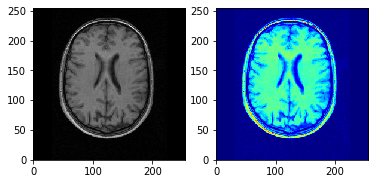

In [35]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(slice_data[:,:].T, cmap='gray', origin= 'lower')
plt.subplot(1,2,2)
plt.imshow(slice_data[:,:].T, cmap='jet', origin= 'lower')

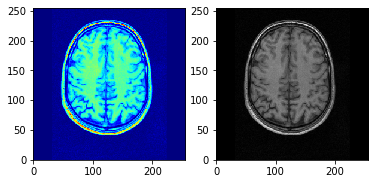

In [73]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(data_anat[:, :, 35].T, cmap='jet', origin= 'lower')
plt.subplot(1,2,2)
plt.imshow(data_anat[:, :, 35].T, cmap='gray', origin= 'lower')

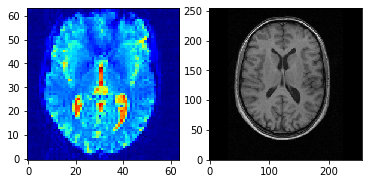

In [72]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(data_fun[:, :, 32].T, cmap='jet', origin= 'lower')
plt.subplot(1,2,2)
plt.imshow(data_anat[:, :, 27].T, cmap='gray', origin= 'lower')

####With the comparison of functional and structural brain mri images,we can notice that when we plot functional images with 'jet' color bar we can easily find out which part of the brain is activated in fmri images,but we can only observe the structure of brain in mri images however it is plot.


####1.6: To plot the time course of the BOLD signal in a given voxel

[648 136 216 256 192 216 296 240 112 328 240 328 216 296 296 232 160 368
 304 128 408 136 176 264 224 240 208 184 192 144 296 184 184  88 152 344
  48 280 328  80 176 104 568 272 152  24 544 776 928 224 288 368 272 448
 248 360 376 608 152  80 344 544 160 296 336 184 168 464 528 280 512 112
 496 128  72 160  96 328 272 232 304  96  56 848]


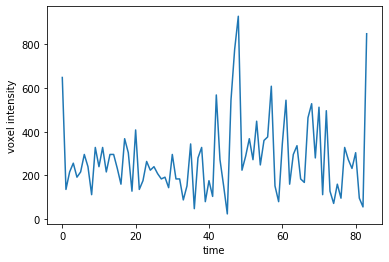

In [101]:
# write your code here
sequence=[]
for i in range(84):
    coordinate=[i,data_run[0,0,0,i]]
    sequence.append(coordinate)
a=np.array(sequence)
print(a[:,1])
plt.plot(a[:,0],a[:,1])
plt.xlabel('time')
plt.ylabel('voxel intensity')
plt.show()

image for 'run.nii.gz' is a 4D array with the shape of (64,64,64,84),I assume that the 4th dimension for this array is time and I create an empty list sample one voxel at the corner of this cube when during the whole process 

## 2. Analysis of a bloc paradigm

The idea is to find voxels in which the regressor describing a condition has some effect on the BOLD signal. Each regressor is actually explaining a part of the variance in a Linear Model.
____

###2.1 Analysis of the auditory stimulation experiment

tutorial can be found in
https://nistats.github.io/auto_examples/01_tutorials/plot_single_subject_single_run.html


In [40]:
from nistats.datasets import fetch_spm_multimodal_fmri
subject_data_new = fetch_spm_multimodal_fmri()
events2 = pd.read_table(subject_data_new['events2'])
print(events2)

    trial_type    onset  duration
0        faces   15.704       1.0
1        faces   24.767       1.0
2        faces   88.249       1.0
3        faces  115.443       1.0
4        faces  124.505       1.0
..         ...      ...       ...
145  scrambled  747.047       1.0
146  scrambled  750.070       1.0
147  scrambled  756.120       1.0
148  scrambled  762.171       1.0
149  scrambled  774.262       1.0

[150 rows x 3 columns]


###2.2. Effect of preprocessing
usually consists of the following steps:
1. Estimation of movements
3. Normalization
3. Smoothing


Here is what a gaussian kernel looks like:

(-1, 1)

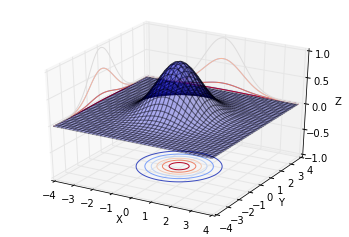

In [71]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-4, 4, 0.1)
Y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-0.5*(np.sqrt(X**2+Y**2)**2));

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-4, 4)
ax.set_ylabel('Y')
ax.set_ylim(-4, 4)
ax.set_zlabel('Z')
ax.set_zlim(-1, 1)

####  Image smoothing example on https://nilearn.github.io/auto_examples/plot_nilearn_101.html

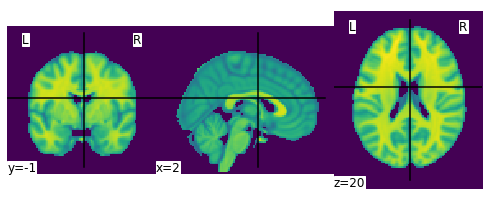

In [2]:
from nilearn import plotting
from nilearn import image
from nilearn.datasets import MNI152_FILE_PATH
plotting.plot_img(MNI152_FILE_PATH)

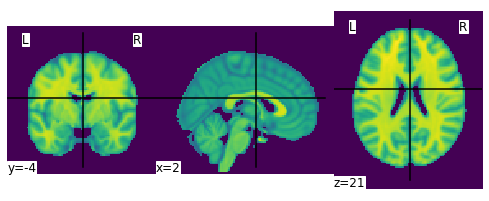

In [8]:
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=1)
plotting.plot_img(smooth_anat_img)

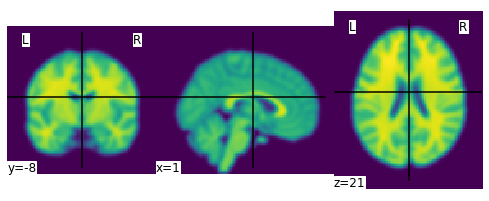

In [9]:
more_smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=5)
plotting.plot_img(more_smooth_anat_img)

smoothing effect increase when parameter fwhm for function smooth_img is larger.

#### 2.3: Generate 3 different smoothed images of the auditory data and do the model estimation


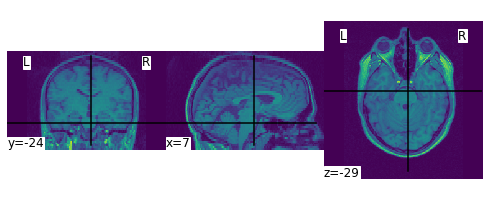

In [33]:
subject_data.anat
smooth_anat_auditory = image.smooth_img(subject_data.anat, fwhm=1)
plotting.plot_img(smooth_anat_auditory)

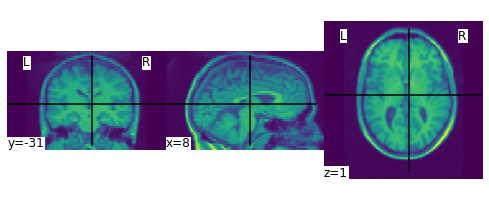

In [34]:
smooth2_anat_auditory = image.smooth_img(subject_data.anat, fwhm=3)
plotting.plot_img(smooth2_anat_auditory)

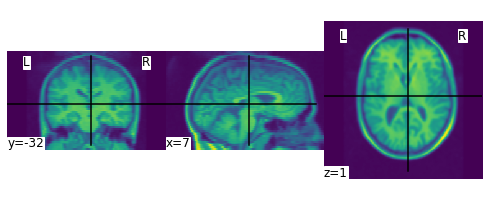

In [35]:
more_smooth_anat_auditory=image.smooth_img(smooth2_anat_auditory, fwhm=3)
plotting.plot_img(more_smooth_anat_auditory)